In [422]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [423]:
from util import evaluate_polynomial_value, build_a

In [424]:
domain = (0,1)

In [425]:
all_x = np.linspace(domain[0], domain[1], 60)
noise = np.random.normal(0, 0.01, all_x.shape[0])
xarg = all_x * 2 * np.pi
all_y = np.sin(xarg) + noise

In [426]:
scrambled_indexes = np.random.permutation(all_x.shape[0])
split = math.floor(all_x.shape[0] / 3)
train_indexes, test_indexes = scrambled_indexes[:split], scrambled_indexes[split:]
train_x, train_y = all_x[train_indexes], all_y[train_indexes]
test_x, test_y = all_x[test_indexes], all_y[test_indexes]

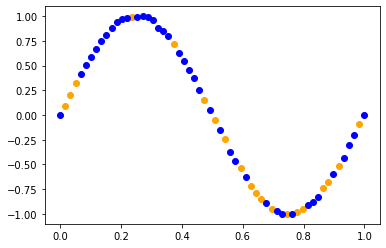

In [427]:
plt.plot(train_x, train_y, marker='o', linestyle='None', color='orange')
plt.plot(test_x, test_y, marker='o', linestyle='None', color='blue')
plt.show()

In [428]:
order = 16
A = build_a(order, train_x)

In [429]:
(mw, residuals, rank, s) = np.linalg.lstsq(A, train_y, rcond=None)

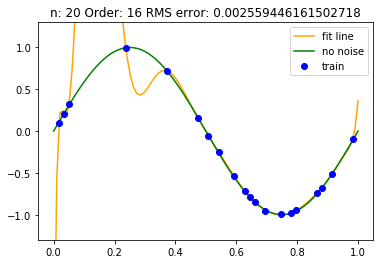

In [430]:
px = np.linspace(domain[0], domain[1], 100)
predicted = [ evaluate_polynomial_value(i, mw) for i in px]
xarg = px * 2 * np.pi
no_noise = np.sin(xarg)
plt.plot(px, predicted, color='orange', label='fit line')
plt.plot(px, no_noise, color='green', label='no noise')
plt.plot(train_x, train_y, marker='o', linestyle='None', color='blue', label='train')
plt.ylim(-1.3, 1.3)

predicted_y = [ evaluate_polynomial_value(i, mw) for i in train_x]
errors = np.square(predicted_y - train_y)
error = 0.5 * np.sum(errors)
rms_error = math.sqrt(2*error/train_x.shape[0])

title = 'n: ' +str(train_x.shape[0]) +' Order: ' +str(order)+ ' RMS error: ' +str(rms_error)

plt.legend()
plt.title(title)
plt.show()